## 目的：绘制加权有向连接图
### 1. 用连接边的颜色表示两个节点之间的强度
### 2. 用边的权重来表示节点连接的强度
### 参考：
https://networkx.org/documentation/stable/auto_examples/drawing/plot_directed.html  
https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html

### 0. 加载python库

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib as mpl
import numpy as np

### 1. 用连接边的颜色表示两个节点之间的强度

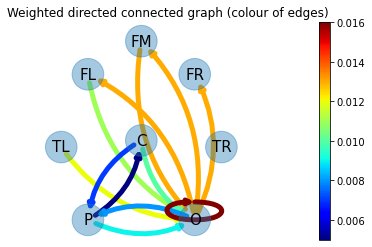

In [5]:
'''0. 自己的权重值矩阵'''
value_new=[[0.,0.,0.,0.,0.,0.,0.,0.013],
       [0.,0.,0.,0.,0.,0.,0.,0.013],
       [0.,0.,0.,0.,0.,0.,0.,0.013],
       [0.,0.,0.,0.,0.,0.,0.,0.],
       [0.,0.,0.,0.,0.,0.,0.,0.],
       [0.,0.,0.,0.,0.,0.,0.005,0.],
       [0.,0.,0.,0.,0.,0.007,0.,0.008],
       [0.011,0.013,0.,0.012,0.,0.01,0.009,0.016]]

''' 1. 初始化图''' 
G = nx.MultiDiGraph()
pos = nx.spring_layout(G)

# 设置节点名称
row = np.array(['FL','FM','FR','TL','TR','C','P','O'])
G.add_nodes_from(['FL','FM','FR','TL','TR','C','P','O'])

''' 2. 将节点的连接边权重加入构建的图'''
for j in range(0,8):
    for i in range(0,8):
        if value_new[i][j] != 0:
            G.add_weighted_edges_from([(row[j],row[i],value_new[i][j])])#边的起点，终点，权重    
        else:
            pass
        
''' 3. 节点的设置 '''        
# 节点大小        
node_sizes = [1000,1000,1000,1000,1000,1000,1000,1000]
# 节点颜色
node_color = ['g','g','g','g','g','g','g','g']
# 设置节点位置
pos={'FL':(38,75),'FM':(40,80),'FR':(42,75),
     'TL':(37,64),'C':(40,65), 'TR':(43,64),
     'P':(38,53),'O':(42,53)}

''' 4. 边的颜色:  用连接边的颜色表示两个节点之间的强度/ 可以用边的权重来表示节点连接的强度 '''
edge_colors=[float(v['weight']) for (r,c,v) in G.edges(data=True)]  
cmap = plt.cm.jet  # jet、viridis、plasma、inferno、magma、cividis...

''' 5. 绘图 ''' 
# 绘制节点
nx.draw_networkx_nodes(G,pos,
                       node_size=node_sizes,
                       #node_color=node_color,
                       alpha=0.4
                      )
# 节点字体大小
nx.draw_networkx_labels(G,pos,font_size=15)

# 绘制连接边
edges = nx.draw_networkx_edges(G,pos,
        edge_color = edge_colors, 
        #alpha=0.5,  # 透明度
        edge_cmap = cmap,
        connectionstyle='arc3, rad = 0.25',  # arc控制双向，rad调线条弧度
        width=5,
       )

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
# 显示colorbar
pc.set_array(edge_colors)

ax = plt.gca()
ax.set_axis_off()
plt.colorbar(pc, ax=ax)
# 保存图片
plt.title('Weighted directed connected graph (colour of edges)')
plt.savefig("CE_Graph.png",dpi=600, bbox_inches='tight')
plt.show()

### 2. 用边的权重来表示节点连接的强度

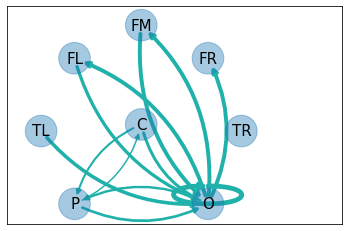

In [6]:
'''0. 自己的权重值矩阵'''
value_new=[[0.,0.,0.,0.,0.,0.,0.,0.013],
       [0.,0.,0.,0.,0.,0.,0.,0.013],
       [0.,0.,0.,0.,0.,0.,0.,0.013],
       [0.,0.,0.,0.,0.,0.,0.,0.],
       [0.,0.,0.,0.,0.,0.,0.,0.],
       [0.,0.,0.,0.,0.,0.,0.005,0.],
       [0.,0.,0.,0.,0.,0.007,0.,0.008],
       [0.011,0.013,0.,0.012,0.,0.01,0.009,0.016]]

''' 1. 初始化图''' 
G = nx.MultiDiGraph()
pos = nx.spring_layout(G)

row = np.array(['FL','FM','FR','TL','TR','C','P','O'])
G.add_nodes_from(['FL','FM','FR','TL','TR','C','P','O'])

''' 2. 将节点的连接边权重加入构建的图'''
for j in range(0,8):
    for i in range(0,8):
        if value_new[i][j] != 0:
            G.add_weighted_edges_from([(row[j],row[i],value_new[i][j]*300)]) # 边的起点，终点，权重 ，因为我的权重实在太小了，所以整体扩大300倍   
        else:
            pass
        
''' 3. 节点的设置 '''        
# 节点大小        
node_sizes = [1000,1000,1000,1000,1000,1000,1000,1000]
# 节点颜色
node_color = ['g','g','g','g','g','g','g','g']
# 设置节点位置
pos={'FL':(38,75),'FM':(40,80),'FR':(42,75),
     'TL':(37,64),'C':(40,65), 'TR':(43,64),
     'P':(38,53),'O':(42,53)}

''' 4. 边的颜色:  用连接边的颜色表示两个节点之间的强度/ 可以用边的权重来表示节点连接的强度 '''
weight=[float(v['weight']) for (r,c,v) in G.edges(data=True)]  

''' 5. 绘图 ''' 
# 绘制节点
nx.draw_networkx_nodes(G,pos,
                       node_size=node_sizes,
                       #node_color=node_color,
                       alpha=0.4
                      )
# 节点字体大小
nx.draw_networkx_labels(G,pos,font_size=15)

# 绘制连接边
edges = nx.draw_networkx_edges(G,pos,
        edge_color = 'lightseagreen', 
        #alpha=0.5,  # 透明度
        edge_cmap = cmap,
        connectionstyle='arc3, rad = 0.25',  # arc控制双向，rad调线条弧度
        width=weight
       )
# 保存图片
plt.savefig("SE_Graph.png",dpi=600, bbox_inches='tight')
plt.show()